In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Load the dataset
file_path = r'E:\data set/Car_sheet.csv'
encodings = ['utf-8', 'latin1', 'ISO-8859-1']
for encoding in encodings:
    try:
        car_data = pd.read_csv(file_path, encoding=encoding)
        print(f"Successfully loaded with encoding: {encoding}")
        break
    except UnicodeDecodeError:
        print(f"Failed to load with encoding: {encoding}")
else:
    raise ValueError("All encoding attempts failed. Please check the file for encoding issues.")

# Display the first few rows of the dataset
print(car_data.head())


Failed to load with encoding: utf-8
Successfully loaded with encoding: latin1
    Brand Condition    Fuel  KMs Driven        Model    Price Registered City  \
0  Toyota      Used  Diesel         1.0        Prado  2100000         Karachi   
1  Suzuki      Used  Petrol    100000.0        Bolan   380000         Karachi   
2  Suzuki      Used     CNG     12345.0        Bolan   340000         Karachi   
3  Suzuki      Used  Petrol     94000.0         Alto   535000         Karachi   
4  Toyota      Used  Petrol    100000.0  Corolla XLI  1430000         Karachi   

  Transaction Type    Year  
0             Cash  1997.0  
1             Cash  2006.0  
2             Cash  1998.0  
3             Cash  2010.0  
4             Cash  2013.0  


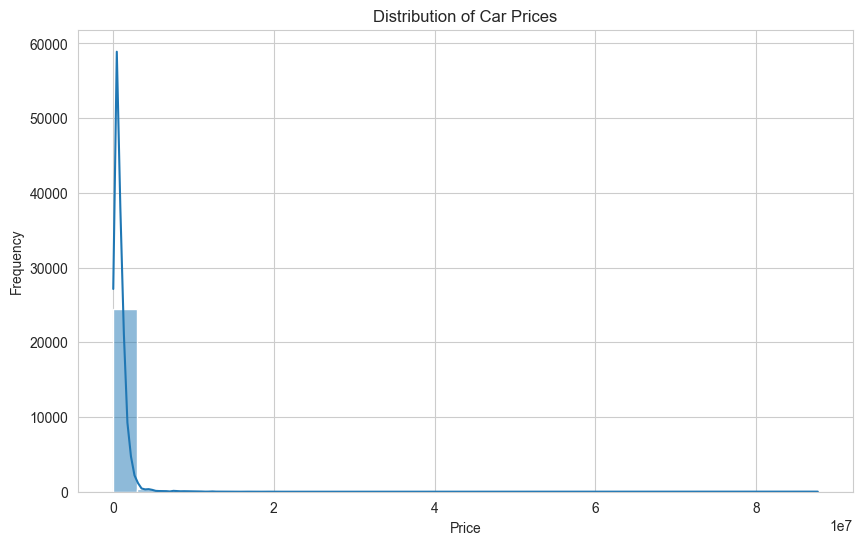

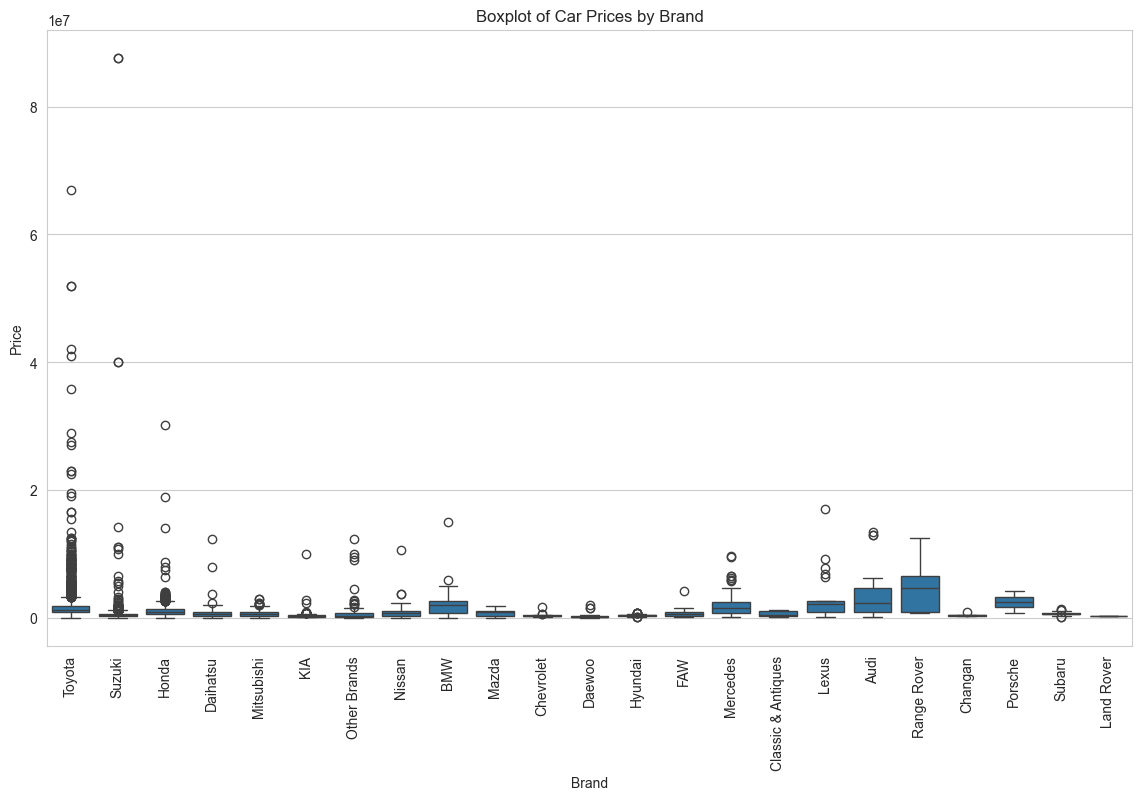

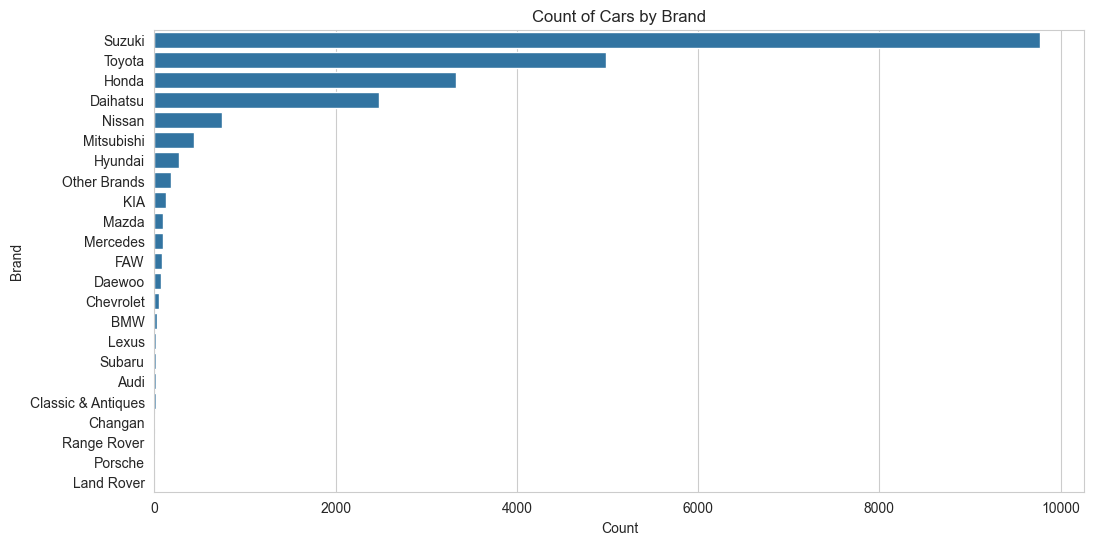

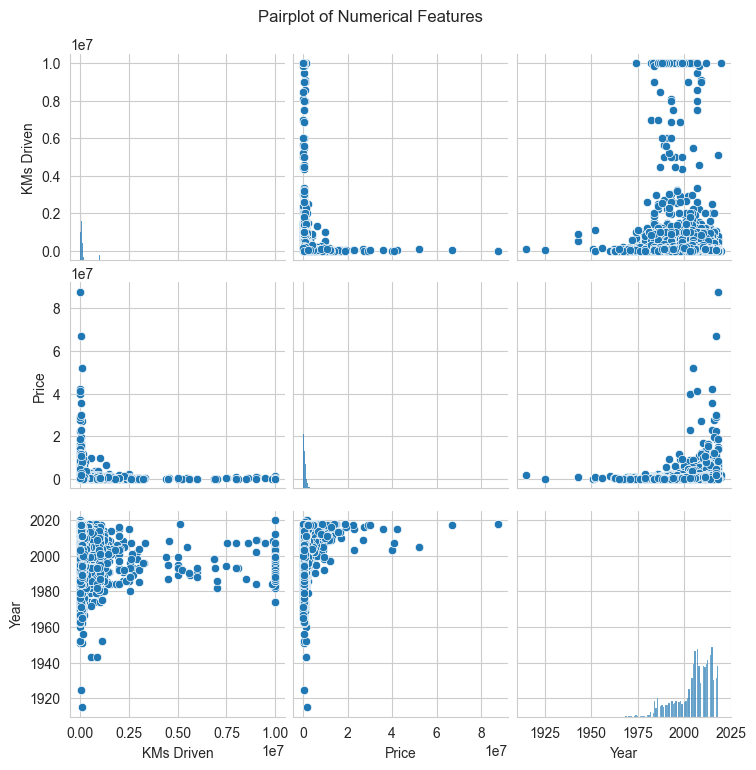

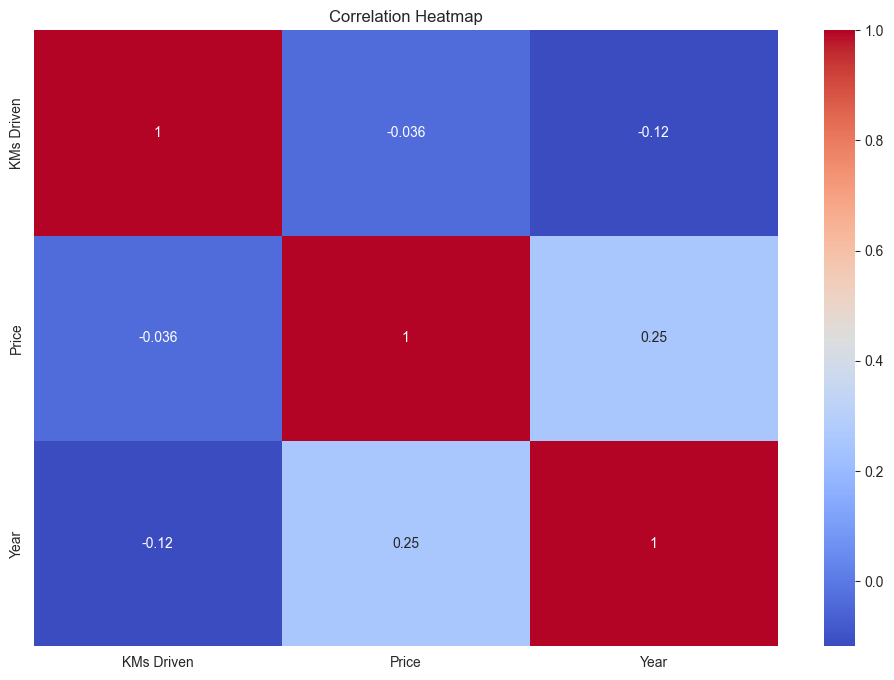

In [5]:
# 1. Histogram of Car Prices
plt.figure(figsize=(10, 6))
sns.histplot(car_data['Price'], bins=30, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# 2. Boxplot of Car Prices by Brand
plt.figure(figsize=(14, 8))
sns.boxplot(x='Brand', y='Price', data=car_data)
plt.title('Boxplot of Car Prices by Brand')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

# 3. Countplot of Car Brands
plt.figure(figsize=(12, 6))
sns.countplot(y='Brand', data=car_data, order=car_data['Brand'].value_counts().index)
plt.title('Count of Cars by Brand')
plt.xlabel('Count')
plt.ylabel('Brand')
plt.show()

# 4. Pairplot of Numerical Features
sns.pairplot(car_data.select_dtypes(include=['float64', 'int64']))
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

# 5. Heatmap of Correlations
plt.figure(figsize=(12, 8))
sns.heatmap(car_data.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [7]:
# Calculate Age of the car based on Year feature
car_data['Age'] = 2024 - car_data['Year']
print(car_data.head())


    Brand Condition    Fuel  KMs Driven        Model    Price Registered City  \
0  Toyota      Used  Diesel         1.0        Prado  2100000         Karachi   
1  Suzuki      Used  Petrol    100000.0        Bolan   380000         Karachi   
2  Suzuki      Used     CNG     12345.0        Bolan   340000         Karachi   
3  Suzuki      Used  Petrol     94000.0         Alto   535000         Karachi   
4  Toyota      Used  Petrol    100000.0  Corolla XLI  1430000         Karachi   

  Transaction Type    Year   Age  
0             Cash  1997.0  27.0  
1             Cash  2006.0  18.0  
2             Cash  1998.0  26.0  
3             Cash  2010.0  14.0  
4             Cash  2013.0  11.0  


In [10]:
from sklearn.impute import SimpleImputer

# Ensure the features are numeric and handle NaN values
imputer = SimpleImputer(strategy='mean')  # You can choose different strategies like 'mean', 'median', 'most_frequent', etc.
X = car_data[['Year', 'KMs Driven', 'Age']].astype(float)
X_imputed = imputer.fit_transform(X)  # Fit and transform the imputer on X

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 1953191182282.7612
R-squared: 0.06765135034739633


Age             4.0       5.0       6.0       7.0       8.0       9.0    \
Price_Range                                                               
<500K        0.000000  0.000000  0.043908  0.011848  0.006969  0.007783   
500K-1M      0.000000  0.000138  0.026145  0.019505  0.020058  0.028635   
1M-1.5M      0.000256  0.000000  0.040225  0.059185  0.056367  0.140149   
1.5M-2M      0.000673  0.000000  0.053163  0.065949  0.129206  0.243607   
>2M          0.000000  0.000000  0.172367  0.167579  0.101915  0.181259   

Age             10.0      11.0      12.0      13.0   ...     60.0      61.0   \
Price_Range                                          ...                       
<500K        0.007783  0.005576  0.013474  0.013358  ...  0.000116  0.000000   
500K-1M      0.047586  0.073592  0.069304  0.069304  ...  0.000138  0.000277   
1M-1.5M      0.128875  0.091981  0.084807  0.086344  ...  0.000000  0.000000   
1.5M-2M      0.169583  0.113055  0.076043  0.032974  ...  0.000000  0.0000

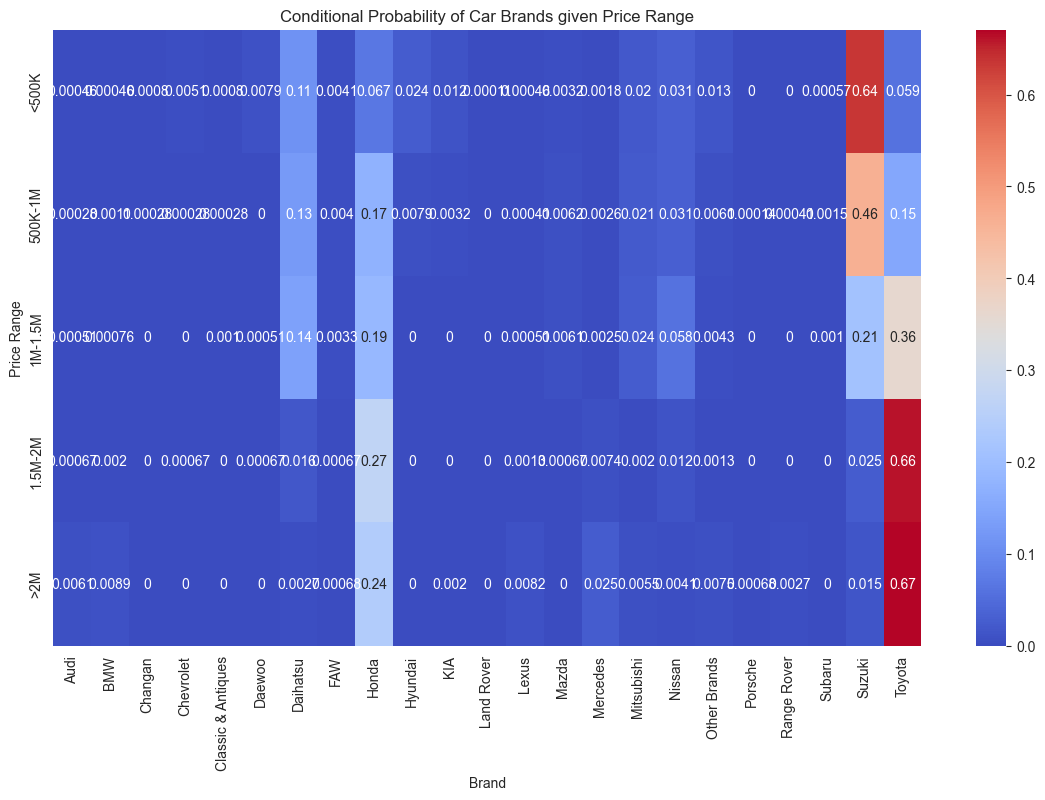

In [31]:
# Define price ranges
bins = [0, 500000, 1000000, 1500000, 2000000, car_data['Price'].max()]
labels = ['<500K', '500K-1M', '1M-1.5M', '1.5M-2M', '>2M']
car_data['Price_Range'] = pd.cut(car_data['Price'], bins=bins, labels=labels)

# Calculate the conditional probability with Age
conditional_prob_age = pd.crosstab(car_data['Price_Range'], car_data['Age'], normalize='index')
print(conditional_prob_age)

# Calculate the conditional probability
conditional_prob = pd.crosstab(car_data['Price_Range'], car_data['Brand'], normalize='index')
print(conditional_prob)

# Visualize the conditional probability
plt.figure(figsize=(14, 8))
sns.heatmap(conditional_prob, annot=True, cmap='coolwarm')
plt.title('Conditional Probability of Car Brands given Price Range')
plt.xlabel('Brand')
plt.ylabel('Price Range')
plt.show()


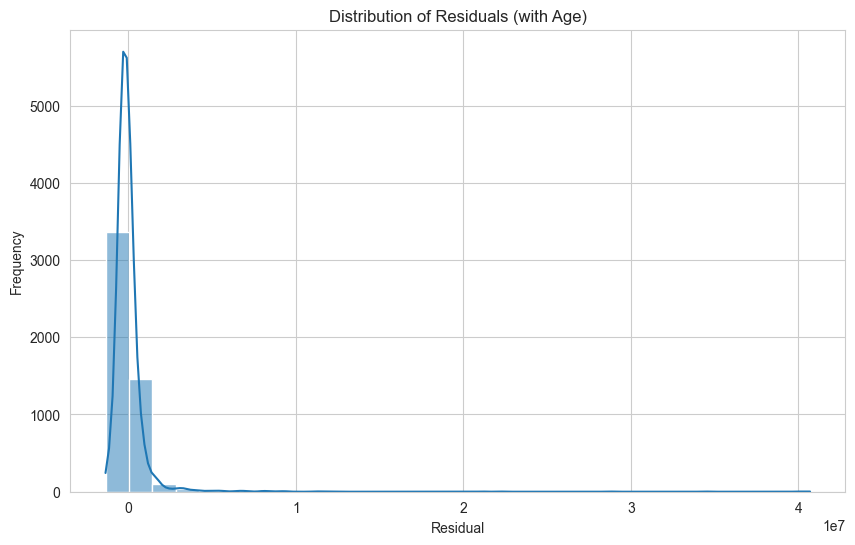

In [32]:
# Plot residuals with Age included
residuals_age = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals_age, bins=30, kde=True)
plt.title('Distribution of Residuals (with Age)')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()
